In [76]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tensor import Tensor, SGD

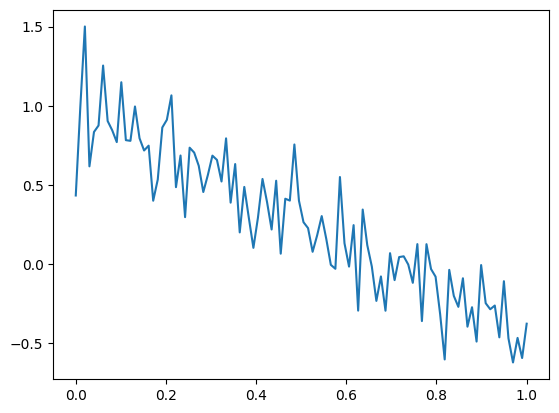

In [77]:
x = np.linspace(0, 1, num=100)
y = -1.5 * x + 1 + np.random.normal(scale=0.2, size=x.shape)
plt.plot(x, y)
plt.show()

In [78]:
epoch = 5
lr = 0.0001
a = Tensor.uniform(-1, +1, requires_grad=True)
b = Tensor.uniform(-1, +1, requires_grad=True)
optim = SGD(lr=lr, params=[a, b])
for i in range(epoch):
    points = list(zip(x, y))
    for x_i, y_i in random.sample(points, len(points)):
        x_i, y_i = Tensor(x_i), Tensor(y_i)
        y_pred = a * x_i + b
        loss = (y_i - y_pred) ** Tensor(2)
        loss.backward()
        optim.step()

-1.8925594686805025 1.1928679235611048


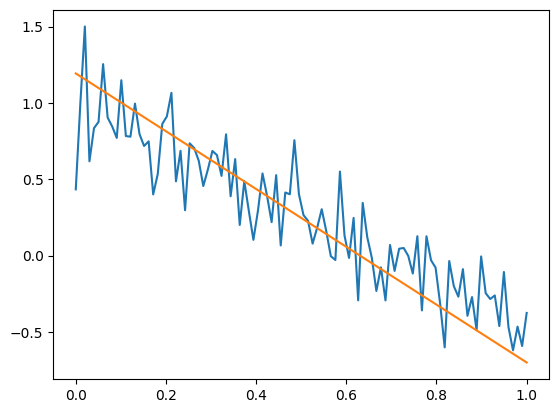

In [79]:
a1, b1 = a.value, b.value
print(a1, b1)
plt.plot(x, y)
plt.plot([x.min(), x.max()], [x.min() * a1 + b1, x.max() * a1 + b1])
plt.show()